In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from import_file import *
set_chinese_font()
# pd.set_option('display.max_rows', 150)
load_libs()

G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = []
for file in ['pudong','xuhui','huangpu', 'luwan', 'jingan', 'changning', 'minghang',\
    'yangpu', 'putuo', 'hongkou', 'baoshan', 'zhabei', 'songjiang', 'jiading']:
    with open('./data/restaurants/'+file+'.json', encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

df = pd.DataFrame(data)

In [3]:
df=df[['title','taste','environment','service','ratings_num','price','type','branch','location','url','image_url']]
df['rating']=(df['taste']+df['environment']+df['service'])/3
df['price']=df['price'].str.replace('￥', '').astype(float)
# df['branch']=df['branch'].apply({"分店":True}.get).fillna(False)
df['branch']=True
df.loc[df['title'].str.contains('\(')==False,'branch']=False
df.describe()

,taste,environment,service,ratings_num,price,rating
count,10442.000000,10442.000000,10442.000000,10442.000000,9977.000000,10442.000000
mean,8.257585,8.232599,8.221854,1337.401839,111.626240,8.237346
std,0.439094,0.577157,0.529806,2486.431186,149.514202,0.463893
min,6.900000,5.200000,5.900000,1.000000,2.000000,6.266667
25%,7.900000,7.800000,7.800000,144.000000,40.000000,7.900000
50%,8.200000,8.200000,8.200000,471.500000,81.000000,8.233333
75%,8.600000,8.700000,8.600000,1368.000000,126.000000,8.566667
max,9.400000,9.400000,9.400000,32079.000000,4749.000000,9.366667


In [4]:
# df[df.duplicated(keep=False)]
# df[df['price'].isnull()]
df.drop_duplicates(subset='url', inplace=True)

# 1. Data Overview

In [5]:
df.describe()

,taste,environment,service,ratings_num,price,rating
count,10333.000000,10333.000000,10333.000000,10333.000000,9868.000000,10333.000000
mean,8.256605,8.231559,8.221291,1329.156682,111.478212,8.236485
std,0.440036,0.578030,0.530359,2482.862873,149.953809,0.464760
min,6.900000,5.200000,5.900000,1.000000,2.000000,6.266667
25%,7.900000,7.800000,7.800000,142.000000,40.000000,7.900000
50%,8.200000,8.200000,8.200000,467.000000,81.000000,8.233333
75%,8.600000,8.700000,8.600000,1361.000000,126.000000,8.566667
max,9.400000,9.400000,9.400000,32079.000000,4749.000000,9.366667


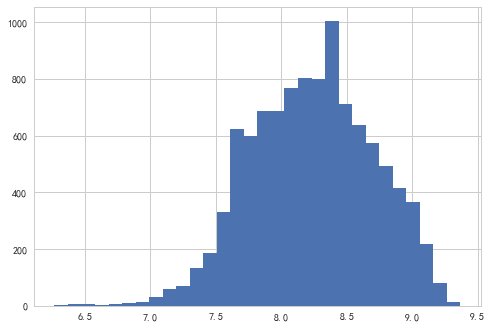

In [6]:
df['rating'].hist(bins=30)

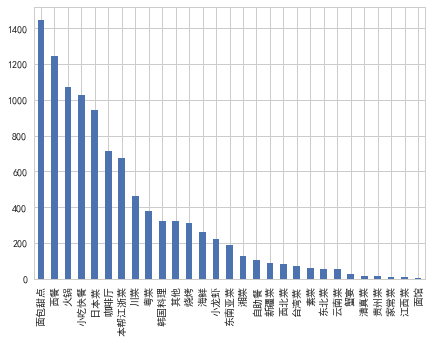

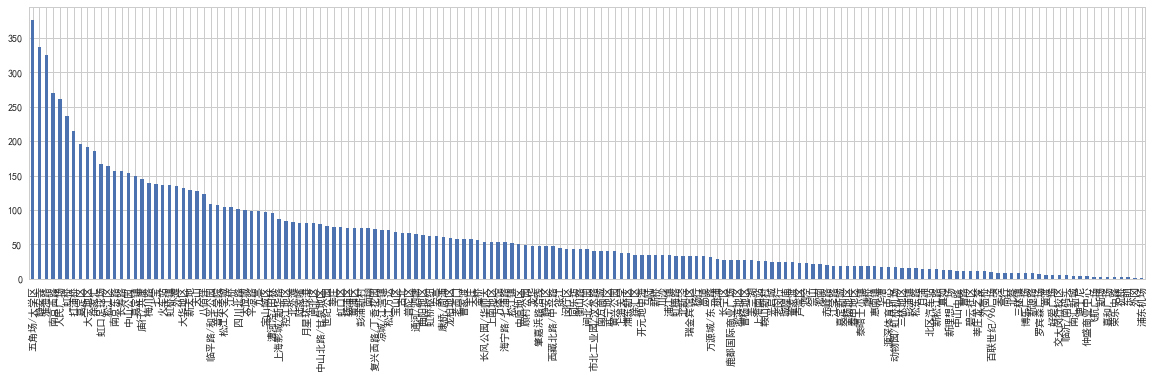

In [7]:
df['type'].value_counts().plot(kind = 'bar', figsize=(7,5))
plt.figure()
df['location'].value_counts().plot(kind = 'bar', figsize=(20,5))

In [8]:
df['ratings_num'].hist(bins=50, figsize=(5,3))
plt.figure()
df['price'].hist(bins=50, figsize=(5,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUAAAADACAYAAAB1V7rGAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAD2JJREFUeJzt3V9oU/f/x/FXftuNIbU3amT5KkXmJludDJF14hRqBVvZ
vsPJLBERoThsbzqKiGGjHcJgjO8mG+tKd1HmmdpVoepY2dr9wUBRdFGnSCOIpN12c+i0xS0GV9Pf
hazMGpOT1jSf7vN8XMm78ZyXH+HFaU5OPr7x8fFxAYCF/q/YAQCgWChAANaiAAFYiwIEYC0KEIC1
KEAA1nq82AH+FovFih0BwL/UypUrM86NKUDp4SEfJhaL5f13ZorJ2SSz85mcTSLfdBQjW7aLK34F
BmAtChCAtTwXYEtLi3744QdJUiQSUW1trVpbWyd+7nUGAKbwVIA//fSThoeHVVlZqd7eXqXTaXV2
dsp1XSUSCc8zADCJL9eXIfz11196+eWXtW7dOq1atUpnzpzRSy+9pHXr1umbb77Rn3/+qYGBAU+z
11577aHn4S4wgEKZ8l3g48eP68knn1RdXZ2++OILHTp0SFu2bJEkBQIBDQ0NKZlMKhgM5pxNNeTD
vNx04oHZV//7b17HKBST78RJZuczOZtEvukw7S5wzgIcGBjQ66+/rvnz5+uVV17R+fPnlUqlJEnJ
ZFLpdFp+v9/TDABMkvM9wMWLF+uXX36RJF2+fFm//fbbRKPG43GFQiGVl5d7mgGASXJeAW7ZskWR
SEQ9PT0aGxuT4zjavXu3XNdVNBpVV1eXfD6fwuFwzhkAmCRnAQYCAX300Uf3zRzHUX9/v+rq6lRS
UpLXDABMMaVH4UpLS1VTUzOlGQCYgidBAFiLAgRgLQoQgLUoQADWogABWIsCBGAtChCAtShAANai
AAFYiwIEYC0KEIC1KEAA1qIAAViLAgRgLQoQgLUoQADWogABWCvrN0KPjY2pqqpKixYtkiS99dZb
+vzzz3X9+nWtXbtW9fX1kqRIJOJpBgAmyXoFePXqVW3atEmO48hxHA0ODiqdTquzs1Ou6yqRSKi3
t9fTDABMk/UK8OLFi/ruu+90/vx5PfHEEyopKVF1dbUkqaKiQrFYTAMDA55mZWVlOcNk28DYq0dx
jEfFpCyZmJzP5GwS+abDpGxZC3D58uVyHEcLFizQO++8o1OnTqm2tlbSvd3ihoaGlEwmFQwGc868
yHvH+MO/Tv8YBRKLxYzJkonJ+UzOJpFvOoqRLVvhZv0VeNmyZVqwYIEkacmSJbp586ZSqZQkKZlM
Kp1Oy+/3e5oBgGmyFuCePXsUj8d19+5d9fX1qbm5eaJN4/G4QqGQysvLPc0AwDRZfwVuaGhQU1OT
JKmyslJVVVUKh8NyXVfRaFRdXV3y+XyeZgBgmqwF+NRTT+mrr766b+Y4jvr7+1VXV6eSkpK8ZgBg
kqwFmElpaalqamqmNAMAk/AkCABrUYAArEUBArAWBQjAWhQgAGtRgACsRQECsBYFCMBaFCAAa1GA
AKxFAQKwFgUIwFoUIABrUYAArEUBArAWBQjAWhQgAGt5KsDh4WG9+uqrkqRIJKLa2lq1trZO/Nzr
DABM4qkA33vvPaVSKfX29iqdTquzs1Ou6yqRSHieAYBpcu4Jcvr0ac2ZM0fz58/X2bNnVV1dLUmq
qKhQLBbTwMCAp1lZWVnOMI9ix3iTdp03KUsmJuczOZtEvukwKVvWArxz545aW1v1ySefqKGhQclk
UsFgUJIUCAQ0NDTkeeZF3jvGH/51+scokFgsZkyWTEzOZ3I2iXzTUYxs2Qo366/A7e3tCofDmjt3
riTJ7/crlUpJkpLJpNLptOcZAJgmawGePn1ahw8f1vbt2zUwMKAff/xxok3j8bhCoZDKy8s9zQDA
NFl/BT506NDEn7dv365PP/1U4XBYrusqGo2qq6tLPp/P0wwATOP5c4CO4ygQCMhxHK1YsUIHDx5U
SUmJ5xkAmCbnXeDJSktLVVNTM6UZAJiEJ0EAWIsCBGAtChCAtShAANaiAAFYiwIEYC0KEIC1KEAA
1qIAAViLAgRgLQoQgLUoQADWogABWIsCBGAtChCAtShAANbyVIAjIyPq7+/XjRs3Cp0HAGZMzgJ0
XVdvvPGGLl26pB07dujGjRuKRCKqra1Va2vrxOu8zgDAFDkL8Nq1a9q3b592796tNWvW6MyZM0qn
0+rs7JTrukokEurt7fU0AwCT5NwTZPXq1ZKkc+fO6dKlSxoZGVF1dbUkqaKiQrFYTAMDA55mZWVl
BfpnAED+PG2KND4+rp6eHj3++L2XB4NBSVIgENDQ0JCSyaSnWS7ZdnD36lEc41ExKUsmJuczOZtE
vukwKZunAvT5fGpubtaBAwf07bffauvWrZKkZDKpdDotv9+vVCqVc5bLypUr80t/+NfpH6NAYrGY
MVkyMTmfydkk8k1HMbJlK9yc7wG2t7fr+PHjkqRbt25p165dEweMx+MKhUIqLy/3NAMAk+S8Aty6
dasaGxt19OhRLV26VFVVVdq2bZtc11U0GlVXV5d8Pp/C4XDOGQCYJGcBlpaWqqOj476Z4zjq7+9X
XV2dSkpK8poBgCk8vQc4WWlpqWpqaqY0AwBT8CgcAGtRgACsRQECsBYFCMBaFCAAa1GAAKxFAQKw
FgUIwFoUIABrUYAArEUBArAWBQjAWhQgAGtRgACsRQECsBYFCMBaFCAAa+X8Ruhbt27pzTff1N27
d+X3+/Xhhx+qpaVF169f19q1a1VfXy9JikQinmYAYIqcV4AnT57Uzp071dHRoXnz5qmnp0fpdFqd
nZ1yXVeJREK9vb2eZgBgkpxXgNu2bZv4882bN3Xy5Ent2LFDklRRUaFYLKaBgQFVV1fnnJWVlRXg
nwAAU+N5U6QLFy5odHRUoVBIwWBQkhQIBDQ0NKRkMulplsuj2DHepF3nTcqSicn5TM4mkW86TMrm
qQBHRka0f/9+ffzxx+ro6FAqlZIkJZNJpdNp+f1+T7Nc8t4x/vCv0z9GgcRiMWOyZGJyPpOzSeSb
jmJky1a4Od8DvHPnjhobG9XU1KRQKKTy8vKJA8bj8bxmAGCSnFeAx44d05UrV9TW1qa2tjZt3rxZ
J06ckOu6ikaj6urqks/nUzgczjkDAJPkLMBwOKxwOHzfrLKyUv39/aqrq1NJSYkkyXEcTzMAMIXn
myD/VFpaqpqaminNAMAUPAkCwFoUIABrUYAArDWl9wBN9nLTiQdmX/3vv0VIAsB0XAECsBYFCMBa
FCAAa1GAAKxFAQKwFgUIwFoUIABrUYAArEUBArAWBQjAWhQgAGtRgACsRQECsJanAhweHr7va/Ej
kYhqa2vV2tqa9wwATJGzAEdHR7V3717dvn1bktTb26t0Oq3Ozk65rqtEIuF5BgAmyVmAjz32mA4c
OKBAICBJOnv2rKqrqyVJFRUVisVinmcAYJKcX4j6d/H9LZlMKhgMTvxsaGjI8yyXQpVkscrX9NI3
OZ/J2STyTYdJ2fL+Rmi/369UKiXpXhmm02nPs1zy3jH+8K+eXjbTO9FL9/6Ti3Fer0zOZ3I2iXzT
UYxs2Qo377vA5eXlEweMx+MKhUKeZwBgkryvAKuqqhQOh+W6rqLRqLq6uuTz+TzNAMAknq8AHceR
dO/9PMdxtGLFCh08eFAlJSWeZwBgkintCldaWqqampopzYqBneIAZMKTIACsRQECsBYFCMBaFCAA
a1GAAKxFAQKwFgUIwFpT+hzgvwGfDQTAFSAAa1GAAKxFAQKwFgUIwFrW3gTJhBsjgF24AgRgLa4A
c+CqEPj3ogCngFIE/h0owEckYykaujENgHsKXoCRSETXr1/X2rVrVV9fX+jTGSVTKUpcLQKmKGgB
9vb2Kp1Oq7O

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
scatter_plot = ax.scatter(df['taste'], df['environment'],alpha=0.5)
fig, ax = plt.subplots(figsize=(4,4))
scatter_plot = ax.scatter(df['environment'], df['service'],alpha=0.5)
fig, ax = plt.subplots(figsize=(4,4))
scatter_plot = ax.scatter(df['service'], df['taste'],alpha=0.5)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP0AAAD2CAYAAAAd8oE/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYHFd5NX5q6b2nZ5d6Fo00I41WW7st5EWysTHywhY/
hMSQBMgHGD7ggxD/PogJ+Uxw4sRAFgg4CWuwTUKCjY13DLZsybJsLZZsLaORZjR7a9ae3ru6lt8f
t6q6uqfq3pF6RjNj9XmeeUa671TV7aq6XfeeOud9OU3TNJRRRhmXDPi57kAZZZRxcVEe9GWUcYmh
POjLKOMSQ3nQl1HGJYbyoC+jjEsM4kzu7ODBgzO5uzLKKOM8sGXLlmn93YwO+vM58HRw8ODBGd3f
TKPcv9JQ7l9psPbvfB645el9GWVcYigP+jLKuMRQHvRllHGJoTzoyyjjEkN50JdRxiWG8qAvowwb
yIqKVFaFrKiO8XhKcoxnJBlDowlkJHk2u3lBmPFXdmWUsZChqhpeOxZB1+Akevpi6IufQltjJa5c
FwbPcwXxrKTA4xYK4rKs4sFnTqCjdxxZSYXHzWNVSw0+smsNRHF+PGPnRy/KKGOe4LVjEZzujwIA
XAIHADjdH8VrxyJT4h63MCX+4DMncKJ7DNA4eFwCoHE40T2GB585cbE/iiPKg76MMnTIioquwUnw
PFfQzvMcugYnkZFkajyRltDROw6e54viPDp6x+fNVL886MsoQ0c6KyMrKbaxrKRgIpahxiOjSWQl
+zV+VlIxEcvMWF9LQXnQzxJYRM9cg9W/UvvPIrKiiQzODGUQTdgPBNb2pfbfLu7ziOaUfXg0iVP9
SQyPJgGQqXx1yGvG+85NYvehPvSdmzTj4boAPG4ypFLpDAZHEkilM3qcR3XIO2P9LwVlIm+GwSJ6
5hqs/pXafxaRlcnIuPuBPegfSUDKKfjlvufRXB/EvXdeA69XZG5fav9pcVHgUVfhwnd++Zb5eYYO
9QMAPnf7ZfC6RVT6eDzwWH59PjiaAhDBne9bg6DPjSX1fjz9ar8ZH49nASRx8zua4XWLs37+p4Py
k36GwSJ65hqs/pXafxaRdfcDe9AbiQMaB4EDoHHojcRx9wN7prV9qf1nxa0D3gqj3TrgrTDan7EM
eCuM9tk+/9NBedDPIFhE0FxP9Uslqlj9z0gylciKjCfQP5KwjfePJBAZT1C3T6SlkvrPih87TR9Y
v3zhJDX+6O4OOGWZ1QCc7B6e1fM/XZQH/QyCRQSls/n1aalrNtb2dmtma/9SqRz6zsWQSuXM/lmJ
qlRGj2fycWv/uwbG8fNnj6NrYNxsI9uT/iRTWQyMxJFMZfXtVRzvGoOikGGRy8mQZPIbABRFw/Gu
MXP7dDqDyGgSaX1NnJVUnSgj/RseS+LA8UEMjyVt+z88msTrxwbNNXlxfGgkhj1H+jE0EjPjLxwa
oJ7zJ18+W1L8pTcGzeOrqoZsToGqarb9K0bx+S8F5TX9DMJKBBXD4xbg87DXdCywtqetmX0eETyn
4vGXziKVkaEB4AD4vSJu3t6C6pAXPAf8+uUzSGZkaBrAcUDAK2LXO5bB5xExHk3j4/c+B+O75uHn
OiHwwI/uvgnVIS84VcFbXVGzvxNxCUACK5sqsLatFoqqIpvLf1HlVCCXlSEKwNq2Wvz6pVN4qytl
xkdjAJDEiiY/wnUByDkJj7zYa8Y7++MAgPdeTfov57J45MU+M356wIgvQXXIi2xOxiMvnjbjfeeS
AIZw69XLcP3mJjy73356DgC3XrsMP3migxr/0ePOs4EdGxtxsGMMfefiiCYyUGQNgsihKuhF86Jg
AVFYDOP+mQmUn/QzCFHg0dZYaX57G1BVDW2NlRAFvuQ1G2t72ppZFHg8/3ofkhkZ4MiABgckMzKe
f70PXreI51/vQSJNniic/h2USMt4/vUeiAJfMOANKCrw8Xufg9ct4pQ+yIpxaiCOcE0Qsv2DDLIC
hGuCOD2Qso2fHkgh6HPj8b29tvHH9/bC6xbx+N4+hzj5fE/uPWsbf3LvWaxbEbbvnI7br19NjX9g
5ypqfHXrIuRkFeOTaXJ9BB7QOIxPppGTVXjdIvP+mQmUB/0M48p1YaxorgIAc6q2orkKV64Ll7zm
Z20/Opmirpm7BsaRSOdQFAbPA4l0Dp29o4incuA5kEWo/sNzQDyVw+ET/VMGvAFFBX77ehe1/8/t
P0ONv3iwmxpn7f/pfaep8Ud3Oz+lAeDeH+2hxv/8H5+ixu/+/m+p8V++cBIukUdtpQ8AzOtdW+mD
S+QhKyr1/pkplKf3Mwye5/COyxuwde1ipLMyfB7R/IZOpnLmlLwYxpqtwu923LexJnfavrN3Aoqi
QbBZJiiKhv1vRaCqpI8o+hNV1bD36BA0jcSthY84jrxKeu51+pr3CcaalhnfU+L2Ja65Xz02Ro13
9OWo8aOnE8zjX7tpCZoXV6CxPoicosIl8OB5ruD6O90/M4Xyk94B03FRjcVlR/GIKPCo8LsLLph1
zV9MlBWv2fpHYnhq7xn060ST/fbxgu3bW6oh6HpxRVGQk8lvABAEDtsuC5tPeVnRzB+APO2vXt9g
xhU1/2PEb7qiiXrObrt2WWnxa0rcnhG/lRF/x7paanzVEhc1vn5FkHl84/qpqgbJQuQVX3+7+2em
UH7SF+F8XFTjE3G8cHzftF1UosCjsTaABx49glRWMYkyv0fAnR/YAFHgEYtl8Yn7foNUNr/49XsE
/PuX34VQyIOmugC+/8gRpDKKhYgT8Onf24C6Sj8WV/vQPZR/4mRlDZBltDYE0dZUgwoPh4lU4ZpR
VjRU+zm0t9ShKujC6GRuSryu0oVNa5oBOCdgvOGKNvzjf77pGL9p23J85xf278EB4LotrfjWw0cv
eP83b1+B7/3PMcf4B3auohJtd3/8GrznS485xr/5hVuo8Xs/fQM1fvv1q7H3yAAe3X0a47EsFFmF
IPKoCXnwgZ0rZmWA26H8pC/C+bioXAJ33i6qh549jmRGATR9hq0ByYyCh549DgBTBjwApLIKPnHf
b8jxnz1Btjdm6BzZ/sFnyfEj4/ZEmNFePOANGO3FA96AU3sZ54fO3gkkUzkAms7NaEimcujsnbho
fSg/6S1gEWWXrahluqi8budTOjqZwuhkBqIwdc08OpnBsdORKQPeQCqr4NjpCEajaYgCB/MxDwA8
MBpN49jpCNJZ++VIOqvisZdPUT//f/+W/sX1X785To3/5b++QI1/4ZuPlxT/1F87P0UB4PcpT1kA
eB8jTntKTyfOOv7+N3vR0TeBqgovNE2DomkQOA4cx6Gjb4J5/8wUyk96C1jimlJdVJ29E1D1zTn9
YnP6ezFVBVMc8sKhAXN7cJafaW5fqrjkSQbR9sapGDV+ZoheFZ0VH4xSw0jTw5htPSTr+E/v6zPv
H47jIPK8ef0vpgtv3g56Vrqi6Wx/voo3lrjG6qJSFCIyUfT9F7uoEmkJp/smkEhLZlt7S7VJlKk6
iaZaiLTrN9OJsus3N+WJNn175Ty2ZxFZzDiDaNu4MkSNL2+gi49Y8cYqahg+enjWb3bW8W/evsS8
fzRNg6yq5oyv+P6ZTVDPQ19fHz75yU/ijjvuwH333XdROqSqGl59cwi/eP4U9hyP4RfPn8Krbw5N
ESxMZ/v/+W3neW3PEtcEfW60N1eheyiKzv4ozk3K6OyPonsoivbmKnjdIiRJwb0/3o/Pf+sF3PMD
8vveH++HJCmoq/SjJugmg93YNwhRVhN0Y92KMHwu+xvf5+KwbkUYVQGyvdFDTd++KkC2Fx3GjcgB
77t2JfXzf/CGNdT4h961lhr/609dT43/45+/t6T4v/7l+6jxX3yLHn+MEf91iXHW8bdd3oJVS6oR
jWcwPJHGyEQ

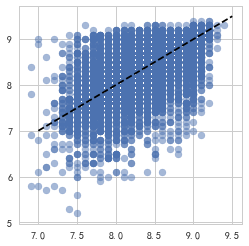

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
scatter_plot = ax.scatter(df['taste'], df['environment'],alpha=0.5)
plt.plot([7,9.5],[7,9.5], linestyle='--', color='black')
plt.show()
# scatter_interactive(fig, scatter_plot, df, 'temp.html')

## Select subset

In [11]:
df = df.query('taste >= 7.5')
df= df[df['location'].str.contains('五角场|控江|鞍山')]
df.describe()

,taste,environment,service,ratings_num,price,rating
count,480.000000,480.000000,480.000000,480.000000,473.000000,480.000000
mean,8.278125,8.276042,8.264375,1951.150000,83.035941,8.272847
std,0.375448,0.531619,0.478168,3183.074367,58.744390,0.405902
min,7.500000,6.000000,6.800000,10.000000,5.000000,6.900000
25%,8.000000,8.000000,7.900000,268.000000,39.000000,8.000000
50%,8.200000,8.300000,8.300000,731.000000,78.000000,8.233333
75%,8.500000,8.700000,8.600000,2239.000000,106.000000,8.566667
max,9.200000,9.200000,9.300000,30443.000000,425.000000,9.166667


# 2. Best Restaurants

In [12]:
df.sort_values(by='rating',ascending=False)

,title,taste,environment,service,ratings_num,price,type,branch,location,url,image_url,rating
5244,海底捞火锅(五角场店),9.1,9.1,9.3,7622,128.0,火锅,True,五角场/大学区,http://www.dianping.com/shop/21274580,https://img.meituan.net/msmerchant/c4cef6726ae...,9.166667
5258,Sky Restaurant & Lounge,9.0,9.2,9.3,330,227.0,西餐,False,五角场/大学区,http://www.dianping.com/shop/67138913,http://p0.meituan.net/merchantpic/96ded381bda0...,9.166667
5245,大肆撸串|特色焖烤(同济大学店),9.2,9.1,9.1,59,90.0,烧烤,True,五角场/大学区,http://www.dianping.com/shop/80612185,http://p0.meituan.net/merchantpic/266c60a8ce6b...,9.133333
5253,老地方澳门特色煲,9.2,9.0,9.1,139,152.0,火锅,False,控江地区,http://www.dianping.com/shop/79469269,http://p0.meituan.net/mogu/4c8d0daa8d764ff6551...,9.100000
5254,首尔炭火烤肉(武川路总店),9.1,9.0,9.1,5378,100.0,韩国料理,True,五角场/大学区,http://www.dianping.com/shop/19156944,https://img.meituan.net/msmerchant/7f704764e65...,9.066667
5266,hotfow火釜炸鸡(旭辉商业广场店),9.1,9.0,9.1,366,47.0,韩国料理,True,鞍山新村,http://www.dianping.com/shop/68236817,http://p0.meituan.net/dpmerchantalbum/99003c23...,9.066667
5265,Casa Bizzar,9.0,9.1,9.1,85,85.0,西餐,False,五角场/大学区,http://www.dianping.com/shop/79233655,http://p0.meituan.net/xianfu/193ffd104d58ac6ec...,9.066667
5268,SU. Colours Coffee Roaster,9.1,9.0,9.1,48,27.0,西餐,False,五角场/大学区,http://www.dianping.com/shop/79670268,http://p1.meituan.net/mogu/db649f3230258f98462...,9.066667
5267,比奇雅炸鸡比萨(黄兴路店),9.0,9.0,9.2,683,50.0,韩国料理,True,五角场/大学区,http://www.dianping.com/shop/56157827,http://qcloud.dpfile.com/pc/A91ZSSvNO7cMspYvzs...,9.066667
5255,左庭右院鲜牛肉火锅(特力时尚汇...,9.1,9.0,9.0,4779,127.0,火锅,True,五角场/大学区,http://www.dianping.com/shop/24064370,http://p1.meituan.net/dpmerchantalbum/e367dd37...,9.033333


# 3. Diff Analysis

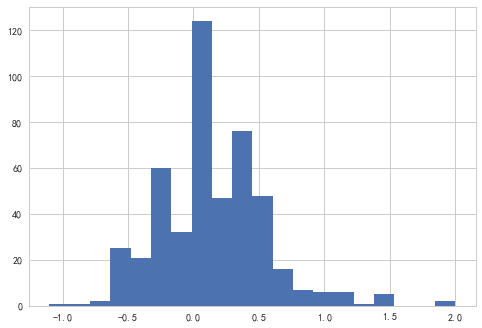

In [13]:
df['diff']=df['taste']-df[['environment','service']].min(axis=1)
df['diff'].hist(bins=20)

0.8000000000013934


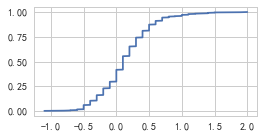

In [14]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['diff'])
plt.plot(ecdf.x, ecdf.y)
plt_configure(figsize=(4,2))
diff_standard = sp.optimize.brentq(lambda x: ecdf(x)-0.95 , 0, 4)
print(diff_standard)

In [15]:
df.query('diff > 0').sort_values(by='diff',ascending=False)

,title,taste,environment,service,ratings_num,price,type,branch,location,url,image_url,rating,diff
5539,蛇王王,8.8,6.8,7.8,440,207.0,火锅,False,控江地区,http://www.dianping.com/shop/5257277,http://qcloud.dpfile.com/pc/yZPQ8TtN04_hpqI8rr...,7.800000,2.0
5690,妙亭涮羊肉(抚顺路店),8.5,6.6,7.1,496,74.0,火锅,True,鞍山新村,http://www.dianping.com/shop/4093684,http://qcloud.dpfile.com/pc/pgfbSNOkIdwD7HFX5I...,7.400000,1.9
5699,木梨膏小摊,7.5,6.0,7.2,716,5.0,小吃快餐,False,鞍山新村,http://www.dianping.com/shop/1914235,http://qcloud.dpfile.com/pc/D33fqtrZ6GAYNTz7Q7...,6.900000,1.5
5400,阿木龙虾(凤城店),8.7,7.2,7.6,1954,124.0,小龙虾,True,控江地区,http://www.dianping.com/shop/8990542,http://p0.meituan.net/mogu/45af31068361deaa868...,7.833333,1.5
5708,不争天下秘制龙虾,8.5,7.1,7.3,2169,115.0,小龙虾,False,五角场/大学区,http://www.dianping.com/shop/6363522,http://qcloud.dpfile.com/pc/YK_Q9IvOe1v0FcwHUp...,7.633333,1.4
5682,日日缘章鱼小丸子(政通路店),8.1,6.7,7.4,1366,9.0,小吃快餐,True,五角场/大学区,http://www.dianping.com/shop/5307661,http://p1.meituan.net/apiback/ed9d2c029a26b99c...,7.400000,1.4
5700,苏州藏书羊肉馆(许昌路店),8.2,6.8,7.5,187,56.0,小吃快餐,True,鞍山新村,http://www.dianping.com/shop/3445165,http://qcloud.dpfile.com/pc/xyU48GBmtztNYK82NE...,7.500000,1.4
5918,谷谷鸡象山海鲜城(辽源西路店),8.2,6.9,7.2,472,122.0,海鲜,True,鞍山新村,http://www.dianping.com/shop/2949736,http://qcloud.dpfile.com/pc/zoPPsZ0BsPOExaUba3...,7.433333,1.3
5449,长顺面馆,8.4,7.2,8.2,89,18.0,小吃快餐,False,控江地区,http://www.dianping.com/shop/45257783,http://p0.meituan.net/xianfu/43f54f0b401ae0207...,7.933333,1.2
5532,莉莲蛋挞(百联又一城购物中心店),8.0,6.9,6.8,2179,14.0,面包甜点,True,五角场/大学区,http://www.dianping.com/shop/58181055,http://qcloud.dpfile.com/pc/KK922bJEkYH6WwZohV...,7.233333,1.2


In [16]:
temp_df = df.sort_values(by='diff',ascending=False)

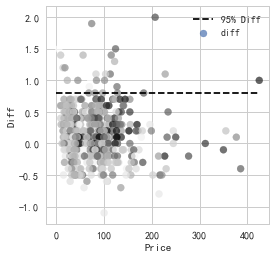

In [17]:
fig, ax = plt.subplots(figsize=(4,4))
scatter_plot = ax.scatter(temp_df['price'], temp_df['diff'], c=temp_df['taste'], alpha=0.7)
plt.plot([0,temp_df['price'].max()],[diff_standard, diff_standard], linestyle='--', color='black', label='95% Diff')
plt_configure(xlabel='Price', ylabel='Diff', legend=True)
plt.show()
scatter_interactive(fig, scatter_plot, temp_df, 'restaurant_diff.html')

# 4. Less know but better restaurants

7948.5918989013235


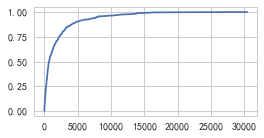

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['ratings_num'])
plt.plot(ecdf.x, ecdf.y)
plt_configure(figsize=(4,2))
ratings_num_standard = sp.optimize.brentq(lambda x: ecdf(x)-0.95 , 0, 20000)
print(ratings_num_standard)

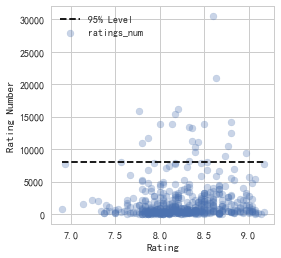

In [19]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.rating, df['ratings_num'], alpha=0.3)
plt.plot([df['rating'].min(),df['rating'].max()],[ratings_num_standard, ratings_num_standard], linestyle='--', color='black', label='95% Level')
plt_configure(xlabel='Rating', ylabel='Rating Number', legend=True, figsize=(4,4))
plt.show()
scatter_interactive(fig, scatter_plot, df, 'restaurant_ratings_num.html')

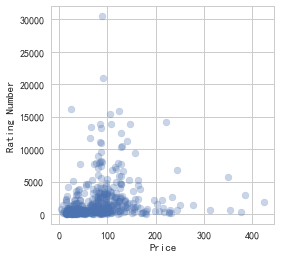

In [20]:
fig, ax = plt.subplots(figsize=(4,4))
scatter_plot = ax.scatter(df.price, df['ratings_num'], alpha=0.3)
plt_configure(xlabel='Price', ylabel='Rating Number')

# 5. Branch analysis

In [21]:
df['branch'].value_counts().plot(kind = 'bar', figsize=(7,5))
plt.figure()
df.query('branch == False')['price'].hist(bins=50)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAasAAAE+CAYAAAAzuj+dAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEz9JREFUeJzt3XFI3Pf9x/HX/WLT9HrHMUhjl/sVREgi7Lq22G3OlRBE
xjSUrYWt5oKEgqzMFmqxUiqFJOSf7Y+ugRSRMHDrd8tuJrA0QliN/ygcG4ZvkwZKLiVkp0igX8Ro
Yq+3Er+3P/KLv6WanKZf933Hez7+0k8u33uD3y9Pv9/73hkplUolAQBg2P+EPQAAAOUQKwCAecQK
AGAesQIAmEesAADmESsAgHlVYTyp67phPC0AwLj6+vpl10OJlXT3gfDf47ouPwdAHAtW3OtEhsuA
AADziBUAwLwVxWp2dlbZbFYzMzNrPQ8AAEuUjZXneXrllVd04cIF7du3TzMzM9q1a5fa29vV3t6u
S5cuSZJ6e3vV1tamvr6+NR8aAFBZyt5gcfnyZb399tt6+umndf36dZ04cUK7d+9WT0/P4mOGh4fl
+74ymYwOHDigfD6vmpqatZwbAFBByp5ZNTY26umnn9bZs2d14cIFbdq0SSMjI9qzZ4+6u7t18+ZN
jY+Pq6WlRZLU0NDArekAgECt6Nb1Uqmk06dPq6qqSnV1dXIcR1u2bNHBgwc1OjqqQqGg6upqSVIs
FtPk5GTZbRI0G/g5ALdwLNi2olhFIhHt379fhw8f1vT0tL7//e9LkmprazUxMaFoNKpisShJKhQK
8n2/7DZ5T0P4eG8JcAvHgg3f6H1WR48e1cmTJyVJN27c0P79+5XL5bSwsKAzZ86orq5OqVRq8Uly
uZySyWRAowMAsIIzq5deekldXV06fvy4tm3bpj/+8Y968803JUlNTU1qbGzU/Py80um0PM/T2NiY
BgcH13xwAEDlKBurRCKhgYGBO9aGhobu+D4Wi8lxHGWzWXV0dCgejwc7JQCgogX22YCJREKtra1B
bc6857s/DHuEYBybCnuCb2To3Z+GPQKA/wI+bgkAYB6xAgCYR6wAAOYRKwCAecQKAGAesQIAmEes
AADmESsAgHnECgBgHrECAJhHrAAA5hErAIB5xAoAYB6xAgCYR6wAAOYRKwCAecQKAGAesQIAmEes
AADmESsAgHnECgBgHrECAJhHrAAA5hErAIB5xAoAYB6xAgCYR6wAAOYRKwCAeSuK1ezsrLLZrGZm
ZtZ6HgAAligbK8/z9Morr+jChQvat2+fZmZm1Nvbq7a2NvX19S0+brk1AACCUDZWly9f1ttvv61f
/epXeu655/SPf/xDvu8rk8nI8zzl83kNDw8vWQMAIChV5R7Q2NgoSTp79qwuXLig2dlZtbS0SJIa
Ghrkuq4uXry4ZK2mpuae23Vd9xuODrAfITjsS7aVjZUklUolnT59WlVVtx5eXV0tSYrFYpqcnFSh
UFiyVk59ff39zmzDsamwJ4DWwX4EE1zXZV8y4F6/MKzoBotIJKL9+/frmWee0fnz51UsFiVJhUJB
vu8rGo0uWQMAIChlY3X06FGdPHlSknTjxg398pe/XKxfLpdTMplUKpVasgYAQFDKXgZ86aWX1NXV
pePHj2vbtm1qbm7W3r175XmexsbGNDg4qEgkonQ6fccaAABBKRurRCKhgYGBO9Ycx1E2m1VHR4fi
8fhd1wAACMKKbrD4ukQiodbW1rJrAAAEgY9bAgCYR6wAAOYRKwCAecQKAGAesQIAmEesAADmESsA
gHnECgBgHrECAJhHrAAA5hErAIB5xAoAYB6xAgCYR6wAAOYRKwCAecQKAGAesQIAmEesAADmESsA
gHnECgBgHrECAJhHrAAA5hErAIB5xAoAYB6xAgCYR6wAAOYRKwCAecQKAGBeVbkH3LhxQ2+88YYW
FhYUjUb13nvv6cc//rGeeOIJSdI777yjHTt2qLe3V1euXNHOnTvV2dm55oMDACpH2TOrU6dO6eWX
X9bAwIA2b96so0ePavfu3XIcR47jaMeOHRoeHpbv+8pkMvI8T/l8/r8wOgCgUpQ9s9q7d+/i19eu
XdO3v/1tjYyM6OOPP9bWrVv1m9/8RuPj42ppaZEkNTQ0yHVd1dTUrNnQAIDKUjZWt507d05zc3Nq
bGzUiy++qC1btujgwYMaHR1VoVBQdXW1JCkWi2lycrLs9lzXvf+pgf/DfoSgsC/ZtqJYzc7O6tCh
Qzpy5Igee+wxbdy4UZJUW1uriYkJRaNRFYtFSVKhUJDv+2W3WV9f/w3GNuDYVNgTQOtgP4IJruuy
Lxlwr18Yyr5m9dVXX6mrq0vd3d1KJpPq6elRLpfTwsKCzpw5o7q6OqVSqcUnyeVySiaTwU0PAKh4
Zc+sTpw4oU8//VT9/f3q7+/XD37wA/X09EiSmpqa1NjYqPn5eaXTaXmep7GxMQ0ODq754ACAylE2
Vul0Wul0+o6111577Y7vY7GYHMdRNptVR0eH4vF4sFMCACraim+wKCeRSKi1tTWozQEAsIhPsAAA
mEesAADmESsAgHnECgBgHrECAJhHrAAA5hErAIB5xAoAYB6xAgCYR6wAAOYRKwCAecQKAGAesQIA
mEesAADmESsAgHnECgBgHrECAJhHrAAA5hErAIB5xAoAYB6xAgCYR6wAAOYRKwCAecQKAGAesQIA
mEesAADmESsAgHnECgBgHrECAJhXVe4BN27c0BtvvKGFhQVFo1G99957OnDggK5cuaKdO3eqs7NT
ktTb27tkDQCAIJQ9szp16pRefvllDQwMaPPmzTp9+rR831cmk5Hnecrn8xoeHl6yBgBAUMqeWe3d
u3fx62vXrunUqVPat2+fJKmhoUGu6+rixYtqaWm5Y62mpmZtJgYAVJyysbrt3LlzmpubUzKZVHV1
tSQpFotpcnJShUJhyVo5ruve58jA/2M/QlDYl2xbUaxmZ2d16NAhHTlyRAMDAyoWi5KkQqEg3/cV
jUaXrJVTX1//DcY24NhU2BNA62A/ggmu67IvGXCvXxjKvmb11VdfqaurS93d3Uomk0qlUosbzOVy
d10DACAoZc+sTpw4oU8//VT9/f3q7+/Xiy++qA8//FCe52lsbEyDg4OKRCJKp9N3rAEAEJSysUqn
00qn03esNTU1KZvNqqOjQ/F4XJLkOM6SNQAAgrDiGyz+UyKRUGtra9k1AACCwCdYAADMI1YAAPOI
FQDAPGIFADCPWAEAzCNWAADziBUAwDxiBQAwj1gBAMwjVgAA84gVAMA8YgUAMI9YAQDMI1YAAPOI
FQDAPGIFADCPWAEAzCNWAADziBUAwDxiBQAwj1gBAMwjVgAA84gVAMA8YgUAMI9YAQDMI1YAAPOI
FQDAPGIFADCPWAEAzFtRrKanp5VOpyVJN2/e1K5du9Te3q729nZdunRJktTb26u2tjb19fWt3bQA
gIpUNlZzc3N666239OWXX0qSLl26pN27d8txHDmOox07dmh4eFi+7yuTycjzPOXz+bWeGwBQQcrG
asOGDTp8+LBisZgk6fz58xoZGdGePXvU3d2tmzdvanx8XC0tLZKkhoYGua67tlMDACpKVbkH3I7U
bU8++aQcx9GWLVt08OBBjY6OqlAoqLq6evHxk5OTZZ+YoCEI7EcICvuSbWVj9XV1dXXauHGjJKm2
tlYTExOKRqMqFouSpEKhIN/3y26nvr5+tU9ty7GpsCeA1sF+BBNc12VfMuBevzCs+m7Anp4e5XI5
LSws6MyZM6qrq1MqlVp8klwup2Qyef/TAgDwNas+s3r11VfV3d0tSWpqalJjY6Pm5+eVTqfleZ7G
xsY0ODgY+KAAgMq14lg5jiNJ2r59u4aGhu74t1gsJsdxlM1m1dHRoXg8HuyUAICKtuozq7tJJBJq
bW0NanMAACz

In [22]:
sss

NameError: name 'sss' is not defined

In [ ]:
df = df[df['type'].str.contains('西餐|甜点|快餐|咖啡')==False]

In [ ]:
df.sort_values(by='diff',ascending=False)

In [ ]:
# 非分店
df.query('branch == False').sort_values(by='diff',ascending=False)

In [ ]:
sss